<a href="https://colab.research.google.com/github/KillerStrike17/DeepLearning_for_NLP/blob/master/Recurrent_Neural_Networks_101/SimpleRNN_for_IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
import matplotlib.pyplot as plt

# Load Data

In [15]:
max_features = 10000 # size of embedding layer
maxlen = 500 # number of Sequences
batch_size = 32
print('Loading data...')

Loading data...


In [0]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [17]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

25000 train sequences
25000 test sequences
Pad sequences (samples x time)


In [18]:
# Deciding the number of loops to be run
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)

input_train shape: (25000, 500)


# Initial Model & Plot

In [30]:

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 29s 1ms/step - loss: 1.0823 - acc: 0.5518 - val_loss: 0.7216 - val_acc: 0.5782
Epoch 2/10
25000/25000 [==============================] - 28s 1ms/step - loss: 0.5323 - acc: 0.7523 - val_loss: 0.5695 - val_acc: 0.7399
Epoch 3/10
25000/25000 [==============================] - 28s 1ms/step - loss: 0.5225 - acc: 0.7544 - val_loss: 0.6539 - val_acc: 0.7119
Epoch 4/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.3321 - acc: 0.7762 - val_loss: 0.9264 - val_acc: 0.6993
Epoch 5/10
25000/25000 [==============================] - 28s 1ms/step - loss: 0.2286 - acc: 0.7545 - val_loss: 1.0716 - val_acc: 0.6490
Epoch 6/10
25000/25000 [==============================] - 28s 1ms/step - loss: 0.1729 - acc: 0.6651 - val_loss: 1.5907 - val_acc: 0.5981
Epoch 7/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.1278 - acc: 0.5468 - val_loss: 1.8038 - val_acc

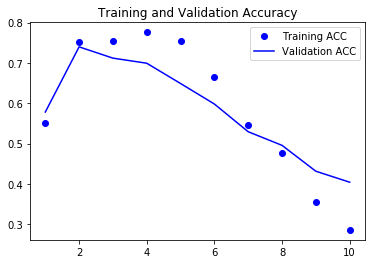

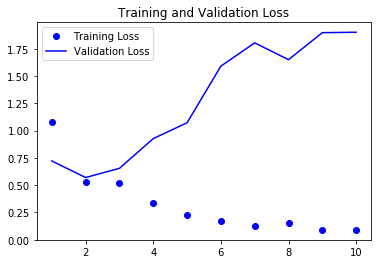

In [32]:
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training ACC')
plt.plot(epochs, val_acc, 'b', label='Validation ACC')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Experiments

## Experiment 1

Add New Layer and test the Model

In [33]:

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32,return_sequences =True))
model.add(SimpleRNN(64))
model.add(Dense(1))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 64)                6208      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 69s 3ms/step - loss: 0.8319 - acc: 0.5595 - val_loss: 0.5968 - val_acc: 0.6815
Epoch 2/10
25000/25000 [==============================] - 68s 3ms/step - loss: 0.8319 - acc: 0.7274 - val_loss: 1.9329 - val_acc: 0.5594
Epoch 3/10
25000/25000 [==============================] - 69s 3ms/step - loss: 0.4753 - acc: 0.8227 - val_loss: 0.5894 - val_acc: 0.7512
Epoch 4/10
24960/25000 [============================>.] - ETA: 0s - loss: 0.3786 - acc: 0.8229

In [0]:
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training ACC')
plt.plot(epochs, val_acc, 'b', label='Validation ACC')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Experiment 2

Replace final Layer activation as Relu

In [25]:

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='relu'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 30s 1ms/step - loss: 0.4726 - acc: 0.8499 - val_loss: 0.5888 - val_acc: 0.7969
Epoch 2/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.3278 - acc: 0.9046 - val_loss: 0.7274 - val_acc: 0.8366
Epoch 3/10
25000/25000 [==============================] - 28s 1ms/step - loss: 0.2291 - acc: 0.9274 - val_loss: 1.1658 - val_acc: 0.7021
Epoch 4/10
25000/25000 [==============================] - 28s 1ms/step - loss: 0.1771 - acc: 0.8973 - val_loss: 0.9976 - val_acc: 0.7819
Epoch 5/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.1390 - acc: 0.8501 - val_loss: 1.2625 - val_acc: 0.7590
Epoch 6/10
25000/25000 [==============================] - 28s 1ms/step - loss: 0.1095 - acc: 0.7652 - val_loss: 1.4354 - val_acc: 0.7044
Epoch 7/10
25000/25000 [==============================] - 28s 1ms/step - loss: 0.0976 - acc: 0.6940 - val_loss: 1.5462 - val_acc

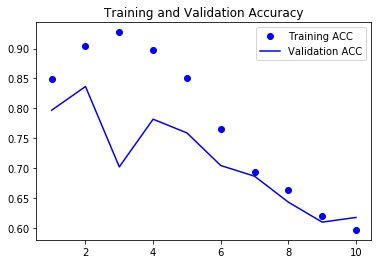

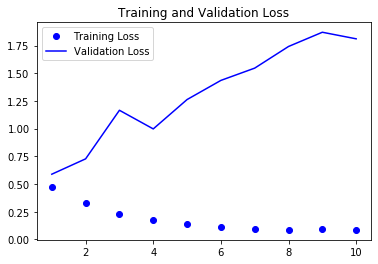

In [29]:
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training ACC')
plt.plot(epochs, val_acc, 'b', label='Validation ACC')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()